In [ ]:
## WeatherPy
----

#### Anaylsis
* It appears that cities with a latitude greater than 20 are currently experiencing autumn, or wintry conditions. The temperature decreases the further north the city is, and the most common reported cloudiness is 100%.
* Humidity seems especially high for those cities with a latitude greater than 40 degrees. This can be seen in the visualization below.
* Wind speed tends not to exceed 25 mph, with a few exceptions in northern cities. This can be seen in the visualization below.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# build url for api request
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "&units=imperial"
req_url = base_url + "appid=" + api_key + units + "&q="

In [4]:
#from each city, get country, temp, cloudiness, humidity, wind speed, latitude, longitude, and date
#use lists to simplify creating the data frame
names = []
countries = []
temps = []
clouds = []
hums = []
winds = []
lats = []
lons = []
dates = []

In [12]:
for i, city in enumerate(cities):
    print("Processing City #" + str(i) + " : " + city) #for terminal print
    resp = requests.get(req_url + city)
    resp_json = resp.json()
    if resp_json['cod'] == "404": #city not found
        print("Skipped city #" + str(i) + " : " + city) #the json is different in this case
        continue
    else:
        names.append(resp_json['name'])
        countries.append(resp_json['sys']['country'])
        temps.append(resp_json['main']['temp'])
        clouds.append(resp_json['clouds']['all'])
        hums.append(resp_json['main']['humidity'])
        winds.append(resp_json['wind']['speed'])
        lats.append(resp_json['coord']['lat'])
        lons.append(resp_json['coord']['lon'])
        dates.append(resp_json['dt'])

Processing City #0 : esperance
Processing City #1 : illoqqortoormiut
Skipped city #1 : illoqqortoormiut
Processing City #2 : bredasdorp
Processing City #3 : mahebourg
Processing City #4 : sobolevo
Processing City #5 : tuktoyaktuk
Processing City #6 : albany
Processing City #7 : new norfolk
Processing City #8 : saskylakh
Processing City #9 : ushuaia
Processing City #10 : rolla
Processing City #11 : port elizabeth
Processing City #12 : mataura
Processing City #13 : phan thiet
Processing City #14 : mys shmidta
Skipped city #14 : mys shmidta
Processing City #15 : honningsvag
Processing City #16 : matagami
Processing City #17 : summerville
Processing City #18 : atuona
Processing City #19 : yatou
Processing City #20 : labytnangi
Processing City #21 : manali
Processing City #22 : cayenne
Processing City #23 : narok
Processing City #24 : aripuana
Processing City #25 : rikitea
Processing City #26 : tura
Processing City #27 : nea stira
Processing City #28 : batemans bay
Processing City #29 : kat

Skipped city #234 : sumbawa
Processing City #235 : manhattan
Processing City #236 : havelock
Processing City #237 : wonthaggi
Processing City #238 : bonfim
Processing City #239 : boa vista
Processing City #240 : ketchikan
Processing City #241 : bargal
Skipped city #241 : bargal
Processing City #242 : shimoda
Processing City #243 : vila franca do campo
Processing City #244 : shelburne
Processing City #245 : tam ky
Processing City #246 : egvekinot
Processing City #247 : comodoro rivadavia
Processing City #248 : babusnica
Processing City #249 : kobryn
Processing City #250 : lima
Processing City #251 : boueni
Processing City #252 : champasak
Processing City #253 : codrington
Processing City #254 : grand bank
Processing City #255 : lebu
Processing City #256 : victoria
Processing City #257 : berlin
Processing City #258 : sao joao da barra
Processing City #259 : omboue
Processing City #260 : bloemhof
Processing City #261 : tikapur
Processing City #262 : husavik
Processing City #263 : ambovomb

Processing City #465 : andenes
Skipped city #465 : andenes
Processing City #466 : winton
Processing City #467 : ilhabela
Processing City #468 : correntina
Processing City #469 : bacabal
Processing City #470 : pokhara
Processing City #471 : kristiansund
Processing City #472 : qui nhon
Skipped city #472 : qui nhon
Processing City #473 : tonosho
Processing City #474 : rantoul
Processing City #475 : aasiaat
Processing City #476 : vaitape
Processing City #477 : vostok
Processing City #478 : rizhao
Processing City #479 : ambulu
Processing City #480 : anqing
Processing City #481 : wad rawah
Processing City #482 : dno
Processing City #483 : newport
Processing City #484 : ilulissat
Processing City #485 : wattegama
Processing City #486 : mwinilunga
Processing City #487 : shaumiani
Skipped city #487 : shaumiani
Processing City #488 : tallahassee
Processing City #489 : naze
Processing City #490 : kargasok
Processing City #491 : kauhajoki
Processing City #492 : tuatapere
Processing City #493 : vest

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
df = pd.DataFrame({'City' : names, 'Country' : countries, 'Date' : dates,
                  'Lat' : lats, 'Lng' : lons, 'Temp (F)' : temps,
                  'Humidity' : hums, 'Wind Speed (mph)' : winds, 'Cloudiness' : clouds})
df

,City,Country,Date,Lat,Lng,Temp (F),Humidity,Wind Speed (mph),Cloudiness
0,Esperance,AU,1573966530,-33.86,121.89,105.80,13,19.46,0
1,Esperance,AU,1573966530,-33.86,121.89,105.80,13,19.46,0
2,Bredasdorp,ZA,1573966555,-34.53,20.04,59.00,72,8.05,98
3,Mahebourg,MU,1573966555,-20.41,57.70,78.64,74,18.34,40
4,Sobolevo,RU,1573966556,54.43,31.90,40.21,94,7.90,100
...,...,...,...,...,...,...,...,...,...
540,Odienne,CI,1573966646,9.51,-7.57,73.33,76,0.54,73
541,Coquimbo,CL,1573966646,-29.95,-71.34,57.20,93,3.36,27
542,Skerries,IE,1573966646,53.58,-6.11,36.14,85,5.82,75
543,Fort Nelson,CA,1573966646,58.81,-122.69,5.00,77,6.93,90


In [15]:
df.to_csv(path_or_buf='city_weather.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

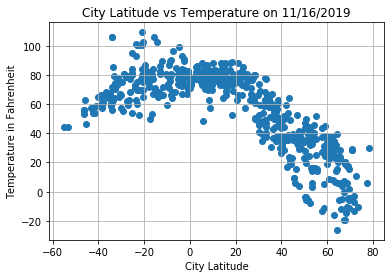

In [16]:
plt.scatter(df['Lat'], df['Temp (F)'])
plt.xlabel('City Latitude')
plt.ylabel('Temperature in Fahrenheit')
plt.grid()
plt.title('City Latitude vs Temperature on ' + time.strftime("%m/%d/%Y", time.localtime()))
plt.savefig('Lat_x_Temp')

#### Latitude vs. Humidity Plot

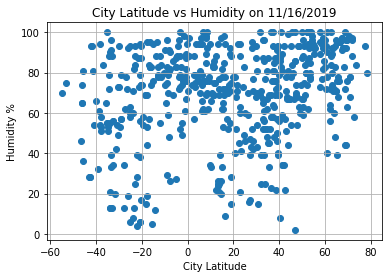

In [17]:
plt.scatter(df['Lat'], df['Humidity'])
plt.xlabel('City Latitude')
plt.ylabel('Humidity %')
plt.grid()
plt.title('City Latitude vs Humidity on ' + time.strftime("%m/%d/%Y", time.localtime()))
plt.savefig('Lat_x_Hum')

#### Latitude vs. Cloudiness Plot

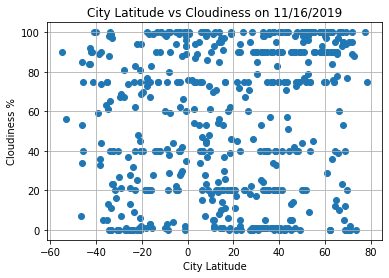

In [18]:
plt.scatter(df['Lat'], df['Cloudiness'])
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness %')
plt.grid()
plt.title('City Latitude vs Cloudiness on ' + time.strftime("%m/%d/%Y", time.localtime()))
plt.savefig('Lat_x_Cloud')

#### Latitude vs. Wind Speed Plot

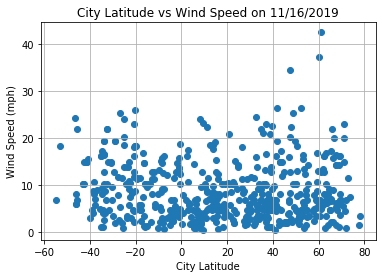

In [19]:
plt.scatter(df['Lat'], df['Wind Speed (mph)'])
plt.xlabel('City Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.title('City Latitude vs Wind Speed on ' + time.strftime("%m/%d/%Y", time.localtime()))
plt.savefig('Lat_x_Wind')